In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np


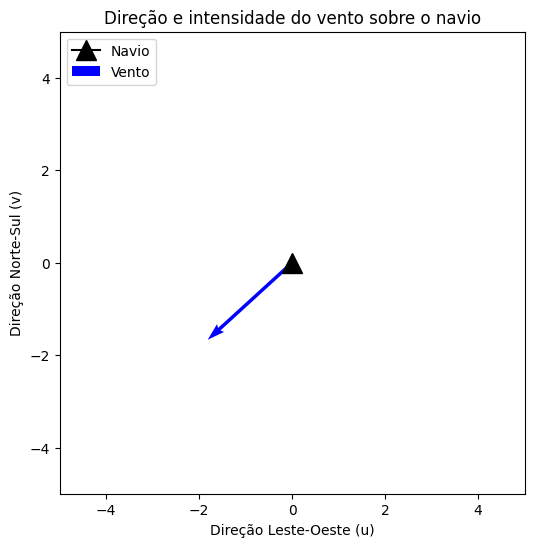

In [9]:
df = pd.read_csv("../../abdias_suez/wind_data_year_2020_month_1_day_1_hour_0.csv")

# === 2. Criar figura e eixo ===
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel("Direção Leste-Oeste (u)")
ax.set_ylabel("Direção Norte-Sul (v)")
ax.set_title("Direção e intensidade do vento sobre o navio")

# === 3. Desenhar o navio (como um triângulo) ===
ship, = ax.plot(0, 0, marker="^", markersize=15, color="black", label="Navio")

# === 4. Criar vetor de vento inicial ===
quiver = ax.quiver(0, 0, df["u10"][0], df["v10"][0], 
                   angles='xy', scale_units='xy', scale=1, color='blue', label="Vento")

ax.legend(loc="upper left")

# === 5. Função de atualização da animação ===
def update(frame):
    quiver.set_UVC(df["u10"][frame], df["v10"][frame])
    ax.set_title(f"Direção e intensidade do vento (t = {df['time'][frame]} s)")
    return quiver,

# === 6. Criar animação ===
ani = FuncAnimation(fig, update, frames=len(df), interval=300, blit=False, repeat=True)

plt.show()

In [10]:
ani.save("vento_navio.mp4", fps=10)


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '600x600', '-pix_fmt', 'rgba', '-framerate', '10', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'vento_navio.mp4']' returned non-zero exit status 3221225785.